# KLD

相对熵（relative entropy）又称为KL散度（Kullback–Leibler divergence，简称KLD），信息散度（information divergence），信息增益（information gain）。

KL散度是两个概率分布P和Q差别的非对称性的度量。

根据shannon的信息论，给定一个字符集的概率分布，我们可以设计一种编码，使得表示该字符集组成的字符串平均需要的比特数最少。假设这个字符集是X，对$x \in X$，其出现概率为$P(x)$，那么其最优编码平均需要的比特数等于这个字符集的熵：

$$
H(X) = \sum_{x \in X} P(x)log[1/P(x)] = - \sum_{x \in X} P(x)log[P(x)]
$$

一个系统越是有序，那么它的信息熵就越低，反之就越高。

两个分布的距离:
$$
D_{KL}(Q||P) = \sum_{x \in X} Q(x)[log(1/P(x))] - \sum_{x \in X} Q(x)[log[1/Q(x)]] = \sum_{x \in X} Q(x)log[Q(x)/P(x)]
$$

又叫交叉熵:
$$
D_{KL} (P || Q) =-H(P) + -H(P, Q)
$$

KL-divergence始终是大于等于0的。当且仅当两分布相同时，KL-divergence等于0.(The KL divergence is 0 only when P and Q have the same distribution.)

## JSD

The gabove KL divergence is asymmetric, which is inconvenient. Therefore, Jensen-Shannon (JS) divergence is an index defined to be symmetric.

$$
D_{JS} =\frac{1}{2}D_{KL}(P||M)+\frac{1}{2}D_{KL}(Q||M) \\ (where\  M(x) = \frac{P(x)+Q(X)}{2})
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, entropy

In [2]:
%matplotlib inline

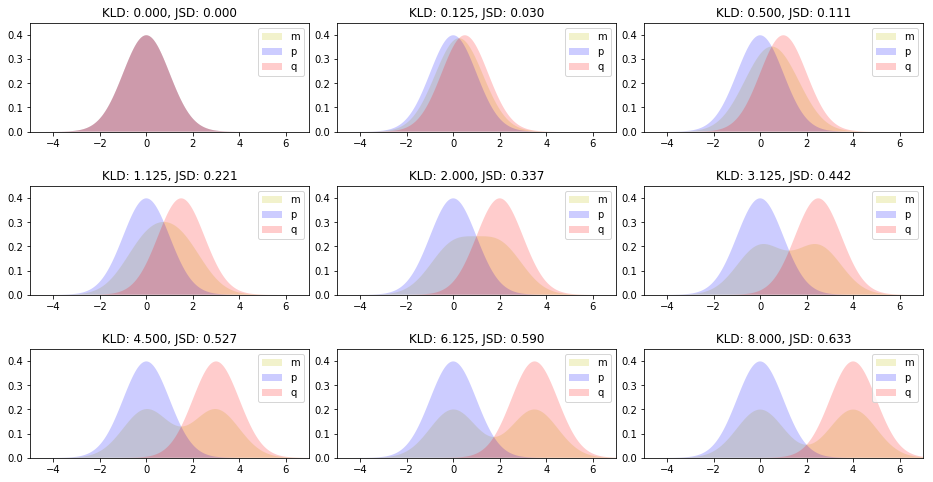

In [3]:
x = np.linspace(-10.0, 10.0, 10000)

#Figure size
plt.figure(figsize = (16, 8))

# 3x3 subplot
for i in np.arange(3):
    for j in np.arange(3):
        index = i * 3 + j
   
        # Define each probability distribution
        p = norm.pdf(x, loc = 0, scale = 1)
        q = norm.pdf(x, loc = index * 0.5, scale = 1)
        # probability distribution of the mean of p and q
        m = (p + q) / 2
   
        # Calculation of KL divergence and JS divergence
        kl = entropy(p, q)
        kl_pm = entropy(p, m)
        kl_qm = entropy(q, m)
        js = (kl_pm + kl_qm) / 2
   
        # subplot
        plt.subplot (3, 3, i * 3 + j + 1)
        # Shape fill
        plt.fill_between (x, m, facecolor = "y", alpha = 0.2, label='m')
        plt.fill_between (x, p, facecolor = "b", alpha = 0.2, label='p')
        plt.fill_between (x, q, facecolor = "r", alpha = 0.2, label='q')
        # Below formatting
        plt.xlim (-5, 7)
        plt.ylim (0, 0.45)
        plt.title ("KLD: {:>.3f}".format(kl) + ", JSD: {:>.3f}".format(js))
        plt.legend()
        # plt.tick_params(labelbottom = False)
        # plt.tick_params(labelleft = False)
  
plt.subplots_adjust (wspace = 0.1, hspace = 0.5)

# References

[浅谈KL散度](https://www.cnblogs.com/hxsyl/p/4910218.html)

[KLD,JSD可視化](http://yusuke-ujitoko.hatenablog.com/entry/2017/05/07/200022)